US Baby Names 1880–2010（1880年至2010年美国婴儿姓名）

这个数据是从1880年到2010年婴儿名字频率数据。我们先看一下这个数据长什么样子：

个数据集可以用来做很多事，例如：

    计算指定名字的年度比例
    计算某个名字的相对排名
    计算各年度最流行的名字，以及增长或减少最快的名字
    分析名字趋势：元音、辅音、长度、总体多样性、拼写变化、首尾字母等
    分析外源性趋势：圣经中的名字、名人、人口结构变化等

之后的教程会涉及到其中一些。另外可以去官网直接下载姓名数据，Popular Baby Names。

下载National data之后，会得到names.zip文件，解压后，可以看到一系列类似于yob1880.txt这样名字的文件，说明这些文件是按年份记录的。这里使用Unix head命令查看一下文件的前10行：

In [1]:
import  pandas as pd


In [2]:
pd.options.display.max_rows=10

In [3]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['names', 'sex', 'births'])

In [4]:
names1880

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [5]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [7]:
# 2010是最后一个有效统计年度
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# 将所有数据整合到单个DataFrame中
names = pd.concat(pieces, ignore_index=True)

In [8]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [9]:
import seaborn as sns
%matplotlib inline

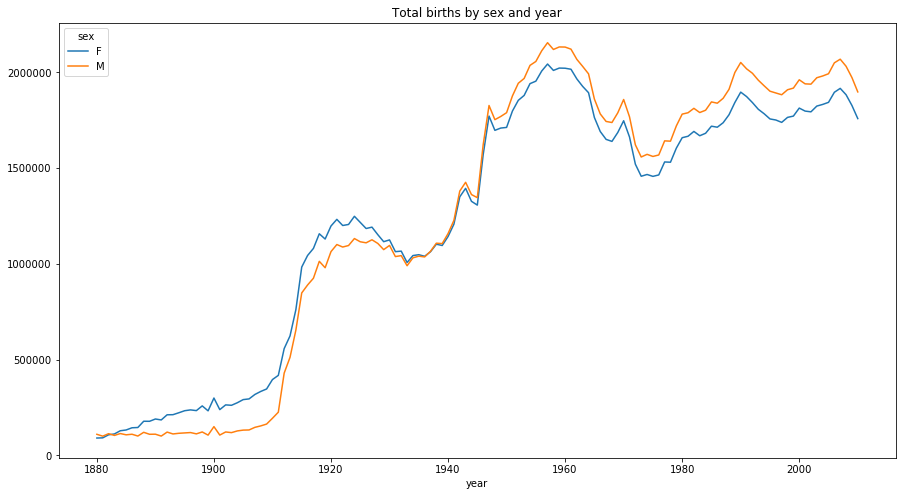

In [10]:
total_births.plot(title='Total births by sex and year', figsize=(15, 8))

In [11]:
def add_prop(group): 
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [12]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [13]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)